#### imports

In [2]:
import pandas as pd
import numpy as np
import demoji
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from scipy.stats import pearsonr


#### load data

In [3]:
data = pd.read_csv('../data/final_dataset_english_only.csv')

In [4]:
data

,Unnamed: 0,commentId,authorChannelId,authorDisplayName,authorChannelUrl,publishedAt_x,updatedAt,likeCount_x,parentId,textDisplay,...,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji
0,10,UgxrR4wFxfCwvp2YUwZ4AaABAg,UC5jUy6FXCr82JYzq96-6_Jw,@a.m_0056skycloud-xf5ec,http://www.youtube.com/@a.m_0056skycloud-xf5ec,2025-07-10T11:05:10Z,2025-07-10T11:05:10Z,0,NaN,This is on of her best songs.🌊,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.29
1,14,Ugw-qH8WQZqma_AugoN4AaABAg,UCPj69nCAxIJCqD0gKRjGGhA,@angelinamidbjerlundholm3058,http://www.youtube.com/@angelinamidbjerlundhol...,2021-11-19T21:16:40Z,2021-11-19T21:16:40Z,0,NaN,Right,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,15,UgywUe9rW4J6ynYErt54AaABAg,UCImqCrcNrl7S1NvrmleWDsg,@thesnesgeek,http://www.youtube.com/@thesnesgeek,2021-04-08T06:18:53Z,2021-04-08T06:18:53Z,2,NaN,"This is her best entry. This time, she is a co...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,17,UgzgxTaLTsQN9OPizbR4AaABAg,UC4YwlR3gBH0m8pvcDIOspaA,@fingerstylemelody8139,http://www.youtube.com/@fingerstylemelody8139,2020-11-26T06:59:25Z,2020-11-26T06:59:25Z,0,NaN,Great,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,18,UgxoGDPYm0L0XFpNoUJ4AaABAg,UC4i1M5RayNtzd5f6Wuyr5sQ,@sarariley8696,http://www.youtube.com/@sarariley8696,2020-07-05T13:10:56Z,2020-07-05T13:10:56Z,2,NaN,This song reminds me of a murder case 4 years ...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356905,620720,Ugz80rAR40R7fArC2LB4AaABAg,UCZgRHU_4W33ZqFEA0OHHrDg,@chinnadande5239,http://www.youtube.com/@chinnadande5239,2025-03-06T11:04:59Z,2025-03-06T11:04:59Z,2,NaN,Who’s here after DJ concert announcement in RC...,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,10.0,0.0,0.00
356906,620722,UgyUlxnQHfHfRV6bOPh4AaABAg,UC4KASbkO9VlSgKj_NHEWSWA,@KING_4_GAMING,http://www.youtube.com/@KING_4_GAMING,2025-03-06T09:43:43Z,2025-03-06T09:43:43Z,2,NaN,RCB Unboxing Events celebrity,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
356907,620726,UgzcPurv2BITJdR9_NZ4AaABAg,UCaBoXl1-gCTzfR73hvYq_IA,@masthmovies3980,http://www.youtube.com/@masthmovies3980,2025-03-06T08:33:07Z,2025-03-06T08:33:07Z,17,NaN,Who is here after RCB unboxing event announcem...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.00
356908,620731,UgzFGi4YnG2pIyT--ph4AaABAg,UCyNzYnJqU051zzDEhNbAfPg,@SHIVAMTIWARI-h6e,http://www.youtube.com/@SHIVAMTIWARI-h6e,2025-03-06T07:59:40Z,2025-03-06T07:59:40Z,3,NaN,WHO IS AFTER RCB UNBOX EVENT 🎉,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.67


In [39]:
for col in data.columns:
    print(col)

Unnamed: 0
commentId
authorChannelId
authorDisplayName
authorChannelUrl
publishedAt_x
updatedAt
likeCount_x
parentId
textDisplay
textOriginal
videoId
genre
lang
preprocessed_comment
vader_neg
vader_neu
vader_pos
vader_compound
title
description
publishedAt_y
channelId
channelTitle
categoryId
tags
liveBroadcastContent
duration
dimension
definition
caption
licensedContent
viewCount
likeCount_y
commentCount
favoriteCount
privacyStatus
madeForKids
selfDeclaredMadeForKids
uploadStatus
embeddable
license
Segment
WC
Analytic
Clout
Authentic
Tone
WPS
BigWords
Dic
Linguistic
function
pronoun
ppron
i
we
you
shehe
they
ipron
det
article
number
prep
auxverb
adverb
conj
negate
verb
adj
quantity
Drives
affiliation
achieve
power
Cognition
allnone
cogproc
insight
cause
discrep
tentat
certitude
differ
memory
Affect
tone_pos
tone_neg
emotion
emo_pos
emo_neg
emo_anx
emo_anger
emo_sad
swear
Social
socbehav
prosocial
polite
conflict
moral
comm
socrefs
family
friend
female
male
Culture
politic
ethnicity
tec

# Wordcloud

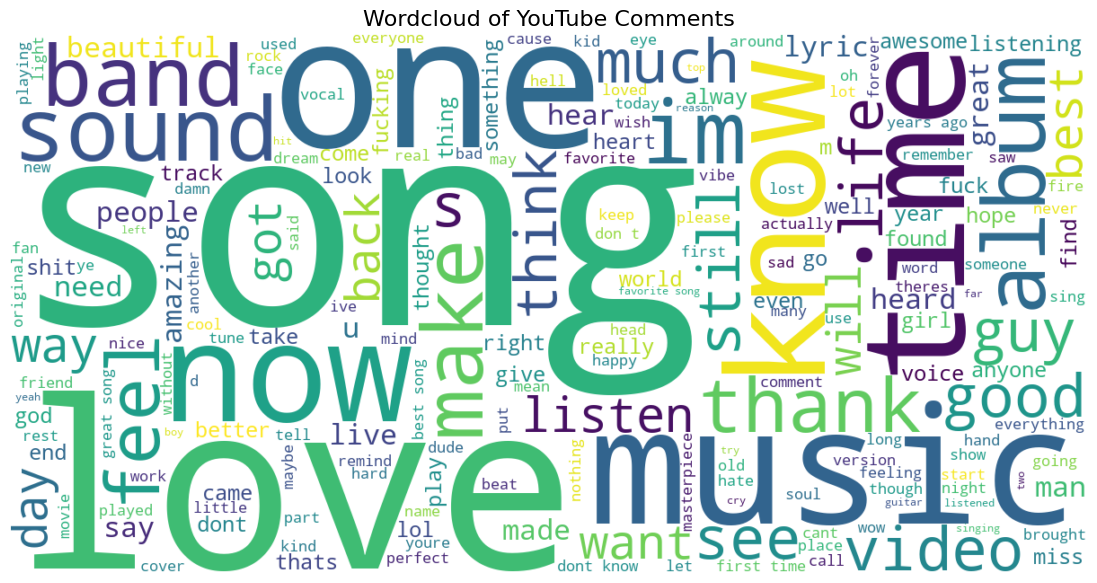

Top 20 words in the wordcloud:
song: 1.0000
love: 0.6464
one: 0.3729
music: 0.2824
time: 0.2130
now: 0.2004
know: 0.1960
sound: 0.1959
im: 0.1934
album: 0.1851
band: 0.1785
make: 0.1777
thank: 0.1747
feel: 0.1663
video: 0.1612
much: 0.1598
s: 0.1586
good: 0.1569
see: 0.1557
life: 0.1556


In [119]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(data["preprocessed_comment"].astype(str).tolist())

wc = WordCloud(
    width=1200,
    height=600,
    background_color="white",
    max_words=200,
    colormap="viridis"
).generate(text)

# Plot
plt.figure(figsize=(14, 7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud of YouTube Comments", fontsize=16)
plt.show()

# Print top 20 words by importance in the wordcloud
print("Top 20 words in the wordcloud:")
for word, freq in list(wc.words_.items())[:20]:
    print(f"{word}: {freq:.4f}")


#### How many english comments exist per genre?

In [120]:
genre_counts = data['genre'].value_counts()

print("Comments per genre:")
print(genre_counts)

# Count genres with fewer than 500 comments
higher_500 = (genre_counts > 500).sum()
print(f"\nNumber of genres with more than 500 comments: {higher_500}")

Comments per genre:
genre
groove metal             3002
djent                    2879
progressive metalcore    2774
melodic metalcore        2729
trancecore               2679
                         ... 
brega                      49
pagode                     41
forro                      35
mpb                        34
rock gaucho                28
Name: count, Length: 260, dtype: int64

Number of genres with more than 500 comments: 233


#### Do certain music genres tend to have higher positive sentiment (vader_pos) compared to others?

C:\Users\Tobias Wollendorfer\AppData\Local\Temp\ipykernel_28564\2150884801.py:66: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0,0),1,1,color="steelblue", edgecolor="black", label="Top 5 Genres"),
C:\Users\Tobias Wollendorfer\AppData\Local\Temp\ipykernel_28564\2150884801.py:67: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0,0),1,1,color="lightcoral", edgecolor="black", label="Bottom 5 Genres")


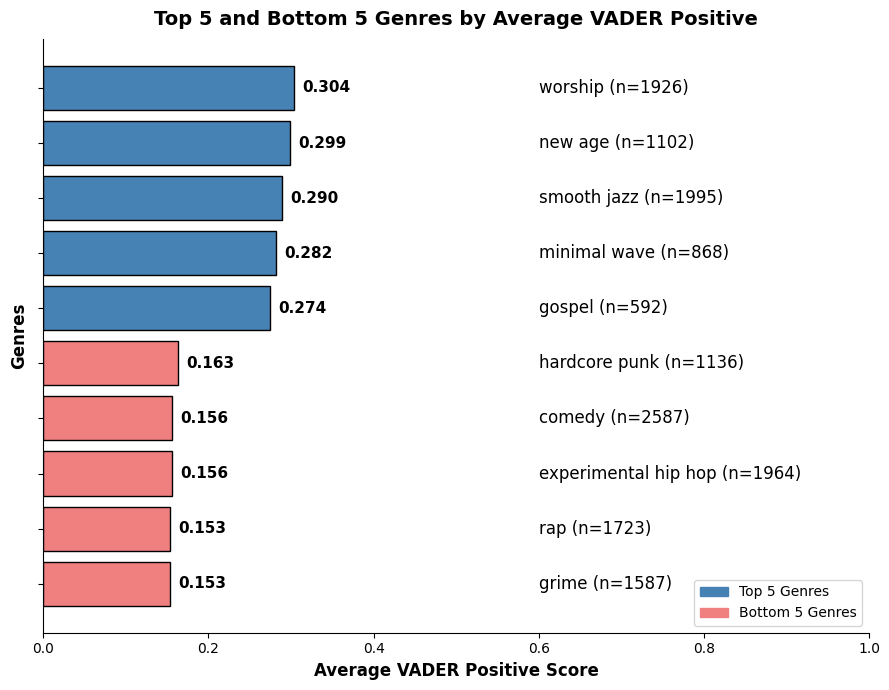

In [121]:
import matplotlib.pyplot as plt
import pandas as pd

data['vader_pos'] = pd.to_numeric(data['vader_pos'], errors='coerce')
MIN_N = 500

agg_pos = (
    data.dropna(subset=['genre'])
       .groupby('genre', dropna=True)
       .agg(mean_pos=('vader_pos', 'mean'),
            n=('vader_pos', 'size'))
)

agg_pos = agg_pos[agg_pos['n'] >= MIN_N]
agg_sorted_pos = agg_pos.sort_values('mean_pos', ascending=False)
top5_pos = agg_sorted_pos.head(5)
bottom5_pos = agg_sorted_pos.tail(5)
extremes_pos = pd.concat([top5_pos, bottom5_pos]).drop_duplicates()

order_pos = list(top5_pos.index) + [g for g in bottom5_pos.index if g not in top5_pos.index]
extremes_pos = extremes_pos.loc[order_pos].copy()

# assign colors: top5 = steelblue, bottom5 = lightcoral
colors = ["steelblue"] * len(top5_pos) + ["lightcoral"] * len(bottom5_pos)

fig, ax = plt.subplots(figsize=(9, 7))

bars = ax.barh(range(len(extremes_pos)), extremes_pos['mean_pos'],
               color=colors, edgecolor='black')

ax.invert_yaxis()

label_x = 0.6
pad = 0.01

for i, (genre, v, n) in enumerate(zip(extremes_pos.index,
                                      extremes_pos['mean_pos'].values,
                                      extremes_pos['n'].values)):
    if v > 0.4:
        ax.text(0.02, i, f"{genre} (n={n})", va='center', ha='left',
                color='white', fontsize=12)   # genre names not bold
    else:
        ax.text(label_x, i, f"{genre} (n={n})", va='center', ha='left',
                color='black', fontsize=12)

    ax.text(min(v + pad, 0.98), i, f"{v:.3f}", va='center', ha='left',
            color="black", fontsize=11, fontweight="bold")

ax.set_title("Top 5 and Bottom 5 Genres by Average VADER Positive",
             fontsize=14, fontweight='bold', pad=10)
ax.set_xlabel("Average VADER Positive Score", fontsize=12, fontweight='bold')
ax.set_ylabel("Genres", fontsize=12, fontweight='bold')

ax.set_yticks(range(len(extremes_pos)))
ax.set_yticklabels([""] * len(extremes_pos))

ax.set_xlim(0, 1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# add a simple legend
ax.legend(handles=[
    plt.Rectangle((0,0),1,1,color="steelblue", edgecolor="black", label="Top 5 Genres"),
    plt.Rectangle((0,0),1,1,color="lightcoral", edgecolor="black", label="Bottom 5 Genres")
], loc="lower right")

plt.tight_layout()
plt.savefig('plots/vader_analysis/average_vader_positive.png', dpi=150, bbox_inches="tight")
plt.show()


#### Do certain music genres tend to have higher negative sentiment (vader_neg) compared to others?

C:\Users\Tobias Wollendorfer\AppData\Local\Temp\ipykernel_28564\1393899756.py:66: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0,0),1,1,color="steelblue", edgecolor="black", label="Top 5 Genres"),
C:\Users\Tobias Wollendorfer\AppData\Local\Temp\ipykernel_28564\1393899756.py:67: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0,0),1,1,color="lightcoral", edgecolor="black", label="Bottom 5 Genres")


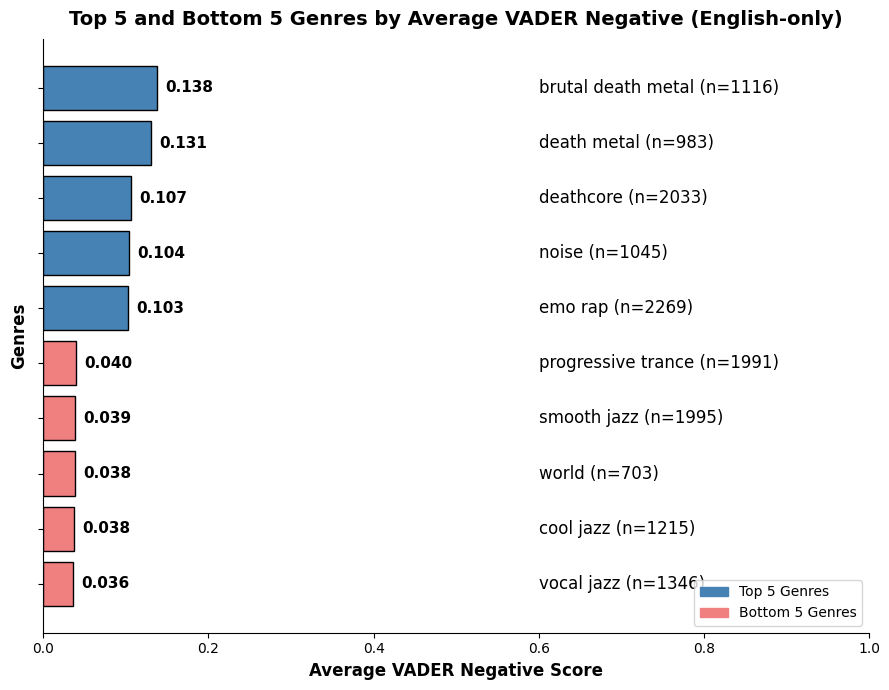

In [122]:
import matplotlib.pyplot as plt
import pandas as pd

data['vader_neg'] = pd.to_numeric(data['vader_neg'], errors='coerce')
MIN_N = 500

agg_neg = (
    data.dropna(subset=['genre'])
       .groupby('genre', dropna=True)
       .agg(mean_neg=('vader_neg', 'mean'),
            n=('vader_neg', 'size'))
)

agg_neg = agg_neg[agg_neg['n'] >= MIN_N]
agg_sorted_neg = agg_neg.sort_values('mean_neg', ascending=False)
top5_neg = agg_sorted_neg.head(5)
bottom5_neg = agg_sorted_neg.tail(5)
extremes_neg = pd.concat([top5_neg, bottom5_neg]).drop_duplicates()

order_neg = list(top5_neg.index) + [g for g in bottom5_neg.index if g not in top5_neg.index]
extremes_neg = extremes_neg.loc[order_neg].copy()

# assign colors: top5 = steelblue, bottom5 = lightcoral
colors = ["steelblue"] * len(top5_neg) + ["lightcoral"] * len(bottom5_neg)

fig, ax = plt.subplots(figsize=(9, 7))

bars = ax.barh(range(len(extremes_neg)), extremes_neg['mean_neg'],
               color=colors, edgecolor='black')

ax.invert_yaxis()

label_x = 0.6
pad = 0.01

for i, (genre, v, n) in enumerate(zip(extremes_neg.index,
                                      extremes_neg['mean_neg'].values,
                                      extremes_neg['n'].values)):
    if v > 0.4:
        ax.text(0.02, i, f"{genre} (n={n})", va='center', ha='left',
                color='white', fontsize=12)   # genre names normal
    else:
        ax.text(label_x, i, f"{genre} (n={n})", va='center', ha='left',
                color='black', fontsize=12)

    ax.text(min(v + pad, 0.98), i, f"{v:.3f}", va='center', ha='left',
            color="black", fontsize=11, fontweight="bold")  # scores bold

ax.set_title("Top 5 and Bottom 5 Genres by Average VADER Negative (English-only)",
             fontsize=14, fontweight='bold', pad=10)
ax.set_xlabel("Average VADER Negative Score", fontsize=12, fontweight='bold')
ax.set_ylabel("Genres", fontsize=12, fontweight='bold')

ax.set_yticks(range(len(extremes_neg)))
ax.set_yticklabels([""] * len(extremes_neg))

ax.set_xlim(0, 1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# add a legend
ax.legend(handles=[
    plt.Rectangle((0,0),1,1,color="steelblue", edgecolor="black", label="Top 5 Genres"),
    plt.Rectangle((0,0),1,1,color="lightcoral", edgecolor="black", label="Bottom 5 Genres")
], loc="lower right")

plt.tight_layout()
plt.savefig('plots/vader_analysis/average_vader_negative.png', dpi=150, bbox_inches="tight")
plt.show()


#### Do certain music genres tend to have higher neutral sentiment (vader_neu) compared to others?

C:\Users\Tobias Wollendorfer\AppData\Local\Temp\ipykernel_28564\3919865987.py:66: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0,0),1,1,color="steelblue", edgecolor="black", label="Top 5 Genres"),
C:\Users\Tobias Wollendorfer\AppData\Local\Temp\ipykernel_28564\3919865987.py:67: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0,0),1,1,color="lightcoral", edgecolor="black", label="Bottom 5 Genres")


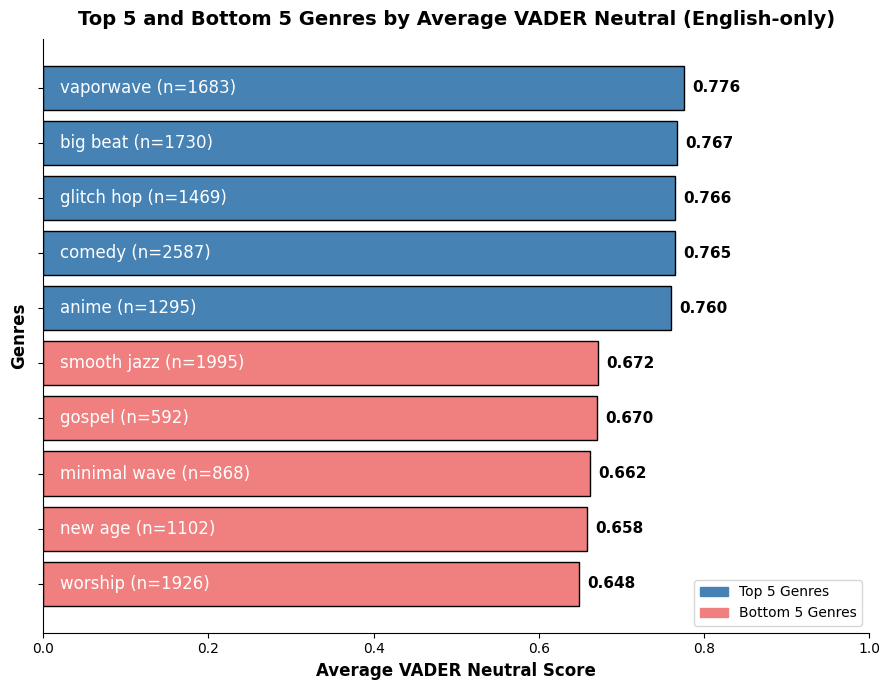

In [123]:
import matplotlib.pyplot as plt
import pandas as pd

data['vader_neu'] = pd.to_numeric(data['vader_neu'], errors='coerce')
MIN_N = 500

agg_neu = (
    data.dropna(subset=['genre'])
       .groupby('genre', dropna=True)
       .agg(mean_neu=('vader_neu', 'mean'),
            n=('vader_neu', 'size'))
)

agg_neu = agg_neu[agg_neu['n'] >= MIN_N]
agg_sorted_neu = agg_neu.sort_values('mean_neu', ascending=False)
top5_neu = agg_sorted_neu.head(5)
bottom5_neu = agg_sorted_neu.tail(5)
extremes_neu = pd.concat([top5_neu, bottom5_neu]).drop_duplicates()

order_neu = list(top5_neu.index) + [g for g in bottom5_neu.index if g not in top5_neu.index]
extremes_neu = extremes_neu.loc[order_neu].copy()

# assign colors: top5 = steelblue, bottom5 = lightcoral
colors = ["steelblue"] * len(top5_neu) + ["lightcoral"] * len(bottom5_neu)

fig, ax = plt.subplots(figsize=(9, 7))

bars = ax.barh(range(len(extremes_neu)), extremes_neu['mean_neu'],
               color=colors, edgecolor='black')

ax.invert_yaxis()

label_x = 0.6
pad = 0.01

for i, (genre, v, n) in enumerate(zip(extremes_neu.index,
                                      extremes_neu['mean_neu'].values,
                                      extremes_neu['n'].values)):
    if v > 0.4:
        ax.text(0.02, i, f"{genre} (n={n})", va='center', ha='left',
                color='white', fontsize=12)   # genre names normal
    else:
        ax.text(label_x, i, f"{genre} (n={n})", va='center', ha='left',
                color='black', fontsize=12)

    ax.text(min(v + pad, 0.98), i, f"{v:.3f}", va='center', ha='left',
            color="black", fontsize=11, fontweight="bold")  # scores bold

ax.set_title("Top 5 and Bottom 5 Genres by Average VADER Neutral (English-only)",
             fontsize=14, fontweight='bold', pad=10)
ax.set_xlabel("Average VADER Neutral Score", fontsize=12, fontweight='bold')
ax.set_ylabel("Genres", fontsize=12, fontweight='bold')

ax.set_yticks(range(len(extremes_neu)))
ax.set_yticklabels([""] * len(extremes_neu))

ax.set_xlim(0, 1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# add legend
ax.legend(handles=[
    plt.Rectangle((0,0),1,1,color="steelblue", edgecolor="black", label="Top 5 Genres"),
    plt.Rectangle((0,0),1,1,color="lightcoral", edgecolor="black", label="Bottom 5 Genres")
], loc="lower right")

plt.tight_layout()
plt.savefig('plots/vader_analysis/average_vader_neutral.png', dpi=150, bbox_inches="tight")
plt.show()


#### Do certain music genres tend to have higher compound sentiment (vader_compound) compared to others?

C:\Users\Tobias Wollendorfer\AppData\Local\Temp\ipykernel_28564\1204464358.py:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0,0),1,1,color="steelblue", edgecolor="black", label="Top 5 Genres"),
C:\Users\Tobias Wollendorfer\AppData\Local\Temp\ipykernel_28564\1204464358.py:65: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0,0),1,1,color="lightcoral", edgecolor="black", label="Bottom 5 Genres")


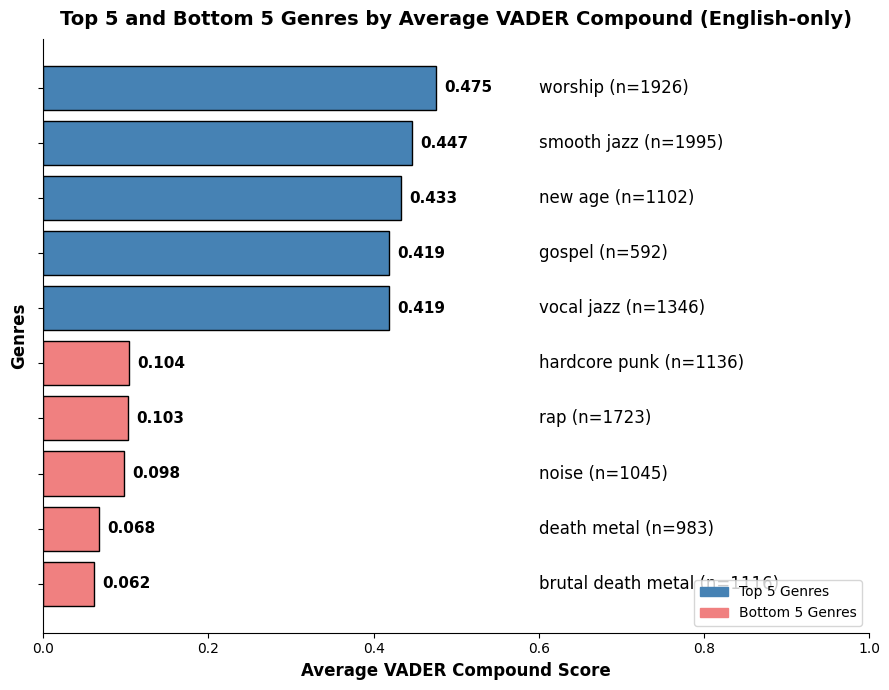

In [124]:
import matplotlib.pyplot as plt
import pandas as pd

data['vader_compound'] = pd.to_numeric(data['vader_compound'], errors='coerce')
MIN_N = 500

agg_comp = (
    data.dropna(subset=['genre'])
       .groupby('genre', dropna=True)
       .agg(mean_comp=('vader_compound', 'mean'),
            n=('vader_compound', 'size'))
)

agg_comp = agg_comp[agg_comp['n'] >= MIN_N]
agg_sorted_comp = agg_comp.sort_values('mean_comp', ascending=False)
top5_comp = agg_sorted_comp.head(5)
bottom5_comp = agg_sorted_comp.tail(5)
extremes_comp = pd.concat([top5_comp, bottom5_comp]).drop_duplicates()

order_comp = list(top5_comp.index) + [g for g in bottom5_comp.index if g not in top5_comp.index]
extremes_comp = extremes_comp.loc[order_comp].copy()

# assign colors: top5 = steelblue, bottom5 = lightcoral
colors = ["steelblue"] * len(top5_comp) + ["lightcoral"] * len(bottom5_comp)

fig, ax = plt.subplots(figsize=(9, 7))

bars = ax.barh(range(len(extremes_comp)), extremes_comp['mean_comp'],
               color=colors, edgecolor='black')

ax.invert_yaxis()

label_x = 0.6
pad = 0.01

for i, (genre, v, n) in enumerate(zip(extremes_comp.index,
                                      extremes_comp['mean_comp'].values,
                                      extremes_comp['n'].values)):
    # genre label outside at x=0.6
    ax.text(label_x, i, f"{genre} (n={n})", va='center', ha='left',
            color='black', fontsize=12)

    # numeric score next to the bar end
    ax.text(min(v + pad, 0.98), i, f"{v:.3f}", va='center', ha='left',
            color="black", fontsize=11, fontweight="bold")

ax.set_title("Top 5 and Bottom 5 Genres by Average VADER Compound (English-only)",
             fontsize=14, fontweight='bold', pad=10)
ax.set_xlabel("Average VADER Compound Score", fontsize=12, fontweight='bold')
ax.set_ylabel("Genres", fontsize=12, fontweight='bold')

ax.set_yticks(range(len(extremes_comp)))
ax.set_yticklabels([""] * len(extremes_comp))

ax.set_xlim(0, 1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# add legend
ax.legend(handles=[
    plt.Rectangle((0,0),1,1,color="steelblue", edgecolor="black", label="Top 5 Genres"),
    plt.Rectangle((0,0),1,1,color="lightcoral", edgecolor="black", label="Bottom 5 Genres")
], loc="lower right")

plt.tight_layout()
plt.savefig('plots/vader_analysis/average_vader_compound.png', dpi=150, bbox_inches="tight")
plt.show()


# Emotional Polarization
Are some genres more polarizing (i.e., high vader_compound variance across comments) than others?

C:\Users\Tobias Wollendorfer\AppData\Local\Temp\ipykernel_28564\994573547.py:58: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0,0),1,1,color="steelblue", edgecolor="black", label="Most Polarized (Top 5)"),
C:\Users\Tobias Wollendorfer\AppData\Local\Temp\ipykernel_28564\994573547.py:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0,0),1,1,color="tomato", edgecolor="black", label="Least Polarized (Bottom 5)")


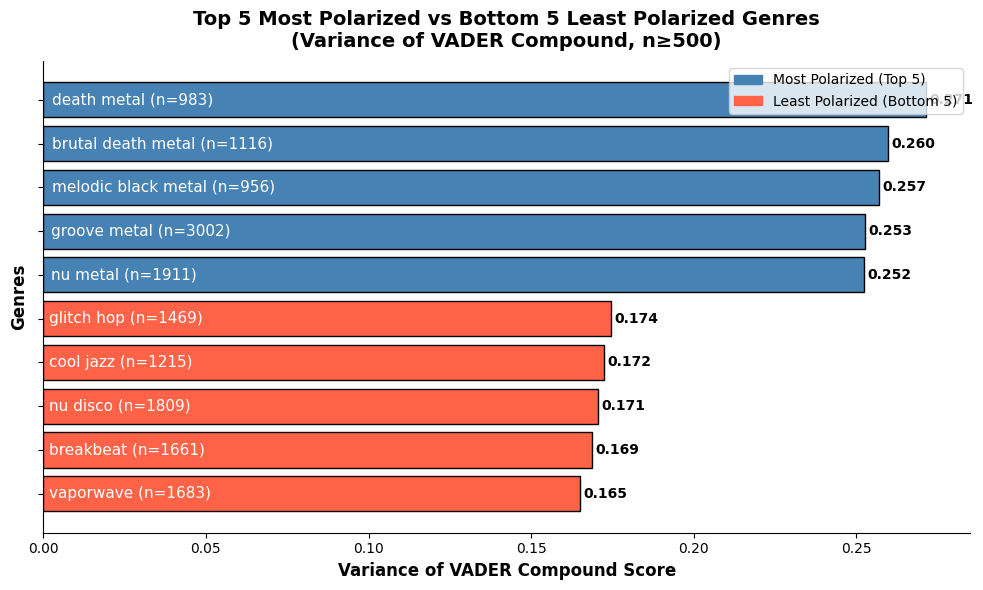

In [125]:
import matplotlib.pyplot as plt
import pandas as pd

data['vader_compound'] = pd.to_numeric(data['vader_compound'], errors='coerce')
MIN_N = 500

agg_var = (
    data.dropna(subset=['genre'])
        .groupby('genre', dropna=True)
        .agg(var_comp=('vader_compound', 'var'),
             n=('vader_compound', 'size'))
)

agg_var = agg_var[agg_var['n'] >= MIN_N]
agg_sorted_var = agg_var.sort_values('var_comp', ascending=False)

k = min(5, len(agg_sorted_var)//2)
top5  = agg_sorted_var.head(k)
bot5  = agg_sorted_var.tail(k)
combined = pd.concat([top5, bot5])

# horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))

colors = ["steelblue"] * len(top5) + ["tomato"] * len(bot5)
bars = ax.barh(range(len(combined)), combined['var_comp'], 
               color=colors, edgecolor="black")

ax.invert_yaxis()

pad = 0.001

for i, (genre, v, n) in enumerate(zip(combined.index,
                                      combined['var_comp'].values,
                                      combined['n'].values)):
    # genre labels at start of the bar (inside)
    ax.text(0.01 * v, i, f"{genre} (n={n})", va='center', ha='left',
            color="white", fontsize=11)
    # variance value at bar end
    ax.text(v + pad, i, f"{v:.3f}", va='center', ha='left',
            color="black", fontsize=10, fontweight="bold")

ax.set_title(f"Top {k} Most Polarized vs Bottom {k} Least Polarized Genres\n"
             f"(Variance of VADER Compound, n≥{MIN_N})",
             fontsize=14, fontweight='bold', pad=10)
ax.set_xlabel("Variance of VADER Compound Score", fontsize=12, fontweight='bold')
ax.set_ylabel("Genres", fontsize=12, fontweight='bold')

ax.set_yticks(range(len(combined)))
ax.set_yticklabels([""] * len(combined))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.legend(handles=[
    plt.Rectangle((0,0),1,1,color="steelblue", edgecolor="black", label="Most Polarized (Top 5)"),
    plt.Rectangle((0,0),1,1,color="tomato", edgecolor="black", label="Least Polarized (Bottom 5)")
], loc="upper right")

plt.tight_layout()
plt.savefig('plots/vader_analysis/polarized_genres_top5_bottom5.png', dpi=150, bbox_inches="tight")
plt.show()


#### do likes influces the positivity/negativity/neutrality or compound score?

In [35]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr, norm
import matplotlib.pyplot as plt

# --- Numeric casting (as before) ---
data['likeCount_x']    = pd.to_numeric(data['likeCount_x'], errors='coerce')
data['vader_pos']      = pd.to_numeric(data['vader_pos'], errors='coerce')
data['vader_neg']      = pd.to_numeric(data['vader_neg'], errors='coerce')
data['vader_neu']      = pd.to_numeric(data['vader_neu'], errors='coerce')
data['vader_compound'] = pd.to_numeric(data['vader_compound'], errors='coerce')

MIN_N = 500
ALPHA = 0.05

def spearman_with_ci(x, y, alpha=ALPHA):

    mask = x.notna() & y.notna()
    x_ = x[mask]
    y_ = y[mask]
    n  = len(x_)
    if n < 4 or x_.nunique() < 2 or y_.nunique() < 2:
        return np.nan, np.nan, n, np.nan, np.nan

    rho, p = spearmanr(x_, y_) 
    rho_clip = np.clip(rho, -0.999999, 0.999999)
    z = np.arctanh(rho_clip)
    se = 1.0 / np.sqrt(max(n - 3, 1))
    z_crit = norm.ppf(1 - alpha/2.0)
    lo = np.tanh(z - z_crit*se)
    hi = np.tanh(z + z_crit*se)
    return rho, p, n, lo, hi

rows = []
for genre, df in data.dropna(subset=['genre']).groupby('genre'):
    if len(df) < MIN_N or df['likeCount_x'].nunique() < 2:
        continue

    rho_pos, p_pos, n_pos, lo_pos, hi_pos = spearman_with_ci(df['likeCount_x'], df['vader_pos'])
    rho_neg, p_neg, n_neg, lo_neg, hi_neg = spearman_with_ci(df['likeCount_x'], df['vader_neg'])
    rho_neu, p_neu, n_neu, lo_neu, hi_neu = spearman_with_ci(df['likeCount_x'], df['vader_neu'])
    rho_cmp, p_cmp, n_cmp, lo_cmp, hi_cmp = spearman_with_ci(df['likeCount_x'], df['vader_compound'])

    rows.append({
        'genre': genre,
        'n_total': len(df),
        'rho_pos': rho_pos, 'ci_lo_pos': lo_pos, 'ci_hi_pos': hi_pos, 'p_pos': p_pos,
        'rho_neg': rho_neg, 'ci_lo_neg': lo_neg, 'ci_hi_neg': hi_neg, 'p_neg': p_neg,
        'rho_neu': rho_neu, 'ci_lo_neu': lo_neu, 'ci_hi_neu': hi_neu, 'p_neu': p_neu,
        'rho_comp': rho_cmp, 'ci_lo_comp': lo_cmp, 'ci_hi_comp': hi_cmp, 'p_comp': p_cmp
    })

spearman_df = pd.DataFrame(rows)

def plot_top_bottom5_spearman(df, rho_col, lo_col, hi_col, n_col='n_total',
                              title="", savefile=None, xlim=(-0.5, 0.6)):
    sdf = df.dropna(subset=[rho_col]).sort_values(rho_col, ascending=False)
    top5 = sdf.head(5)
    bot5 = sdf.tail(5)
    subset = pd.concat([top5, bot5], ignore_index=True)

    y = np.arange(len(subset))
    rho = subset[rho_col].values
    lo  = subset[lo_col].values
    hi  = subset[hi_col].values
    xerr = np.vstack([rho - lo, hi - rho])

    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.barh(y, rho, edgecolor='black')

    ax.errorbar(rho, y, xerr=xerr, fmt='none', capsize=3, linewidth=1)

    ax.set_yticks(y); ax.set_yticklabels([""] * len(y))
    for i, (genre, n, r) in enumerate(zip(subset['genre'], subset[n_col], rho)):
        ax.text(xlim[0] + 0.02, i, f"{genre} (n={n})", va='center', ha='left', fontsize=11)
        ax.text(r + (0.02 if r >= 0 else -0.02), i,
                f"{r:.2f}", va='center',
                ha='left' if r >= 0 else 'right', fontsize=10, fontweight="bold")

    ax.invert_yaxis()
    ax.set_xlim(xlim)
    ax.axvline(0, color='black', linewidth=0.8)
    ax.set_title(title, fontsize=14, fontweight='bold', pad=10)
    ax.set_xlabel("Spearman ρ (Likes vs. Sentiment)", fontsize=12, fontweight='bold')
    ax.set_ylabel("Genres", fontsize=12, fontweight='bold')
    ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)

    ax.legend(handles=[
        plt.Rectangle((0,0),1,1, edgecolor="black", facecolor=bars[0].get_facecolor(), label="Top 5 Genres"),
        plt.Rectangle((0,0),1,1, edgecolor="black", facecolor=bars[-1].get_facecolor(), label="Bottom 5 Genres"),
    ], loc="lower right")

    plt.tight_layout()
    if savefile:
        plt.savefig(savefile, dpi=150, bbox_inches="tight")
    plt.show()

plot_top_bottom5_spearman(
    spearman_df, 'rho_pos', 'ci_lo_pos', 'ci_hi_pos',
    title="Top & Bottom 5 Genres: Likes vs. VADER Positive (Spearman ρ, 95% CI)",
    savefile="plots/vader_analysis/spear_likes_pos_tb5.png", xlim=(-0.5, 0.6)
)

plot_top_bottom5_spearman(
    spearman_df, 'rho_neg', 'ci_lo_neg', 'ci_hi_neg',
    title="Top & Bottom 5 Genres: Likes vs. VADER Negative (Spearman ρ, 95% CI)",
    savefile="plots/vader_analysis/spear_likes_neg_tb5.png", xlim=(-0.5, 0.6)
)

plot_top_bottom5_spearman(
    spearman_df, 'rho_neu', 'ci_lo_neu', 'ci_hi_neu',
    title="Top & Bottom 5 Genres: Likes vs. VADER Neutral (Spearman ρ, 95% CI)",
    savefile="plots/vader_analysis/spear_likes_neu_tb5.png", xlim=(-0.5, 0.6)
)

plot_top_bottom5_spearman(
    spearman_df, 'rho_comp', 'ci_lo_comp', 'ci_hi_comp',
    title="Top & Bottom 5 Genres: Likes vs. VADER Compound (Spearman ρ, 95% CI)",
    savefile="plots/vader_analysis/spear_likes_comp_tb5.png", xlim=(-0.5, 0.6)
)


# hip hop deepdive

In [127]:
data_hip_hop = data[data['genre'].str.contains("hip hop", case=False, na=False)]


In [128]:
data_hip_hop['genre'].value_counts()

genre
hip hop                 2019
experimental hip hop    1964
alternative hip hop     1435
Name: count, dtype: int64

In [129]:
MIN_N = 500
metrics = {
    "vader_pos": "mean_pos",
    "vader_neg": "mean_neg",
    "vader_neu": "mean_neu",
    "vader_compound": "mean_comp"
}

for col in metrics.keys():
    data[col] = pd.to_numeric(data[col], errors="coerce")

all_ranks = []
total_counts = {}

for metric, out_col in metrics.items():
    agg = (
        data.dropna(subset=['genre'])
            .groupby('genre')
            .agg(**{out_col: (metric, 'mean'),
                    'n': (metric, 'size')})
    )
    agg = agg[agg['n'] >= MIN_N]

    total_counts[out_col] = len(agg)

    agg = agg.sort_values(out_col, ascending=False).copy()
    agg['rank_' + out_col] = np.arange(1, len(agg) + 1)

    hiphop = agg[agg.index.str.contains("hip hop", case=False, na=False)].copy()
    hiphop = hiphop[[out_col, 'rank_' + out_col]]

    all_ranks.append(hiphop)

final_table = pd.concat(all_ranks, axis=1)

print("\nHip hop genres: VADER values and ranks (n >= 500 comments)\n")
final_table.to_csv("hip-hop_scores.csv")
final_table


Hip hop genres: VADER values and ranks (n >= 500 comments)



,mean_pos,rank_mean_pos,mean_neg,rank_mean_neg,mean_neu,rank_mean_neu,mean_comp,rank_mean_comp
genre,,,,,,,,
alternative hip hop,0.173295,217,0.084879,23,0.741838,36,0.153589,222
hip hop,0.169410,223,0.080181,39,0.750407,18,0.173212,215
experimental hip hop,0.155787,231,0.101426,7,0.742799,33,0.124063,227


In [130]:
print("\nNumber of genres included in ranking per metric (n >= 500):")
for metric, count in total_counts.items():
    print(f"{metric}: {count} genres")



Number of genres included in ranking per metric (n >= 500):
mean_pos: 233 genres
mean_neg: 233 genres
mean_neu: 233 genres
mean_comp: 233 genres


C:\Users\Tobias Wollendorfer\AppData\Local\Temp\ipykernel_28564\386039199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hip_hop['publishedAt_x'] = pd.to_datetime(data_hip_hop['publishedAt_x'], errors='coerce')


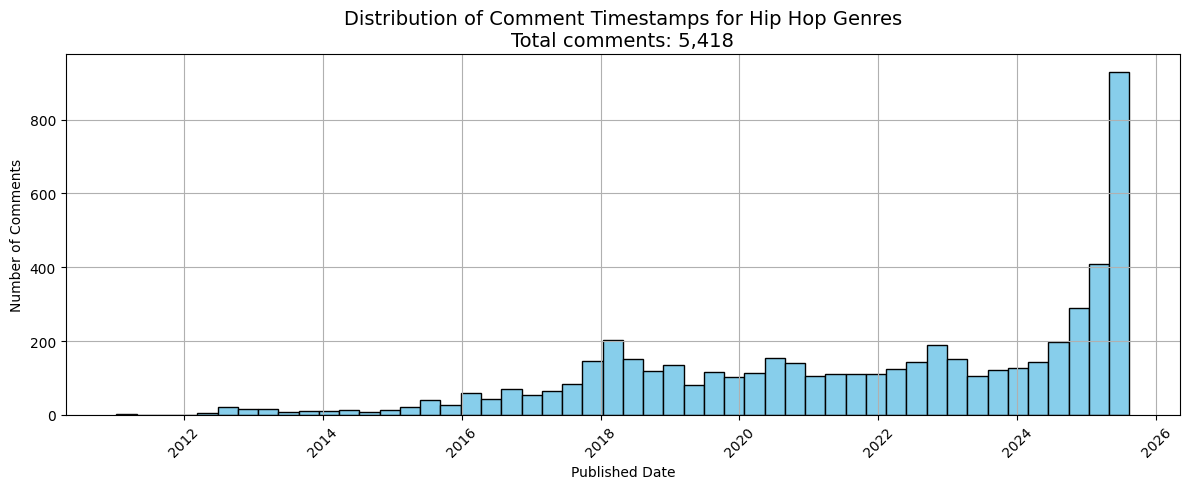

In [131]:
data_hip_hop['publishedAt_x'] = pd.to_datetime(data_hip_hop['publishedAt_x'], errors='coerce')
data_hip_hop = data_hip_hop.dropna(subset=['publishedAt_x'])

total_comments = len(data_hip_hop)

plt.figure(figsize=(12, 5))
data_hip_hop['publishedAt_x'].hist(bins=50, color="skyblue", edgecolor="black")

plt.title(f"Distribution of Comment Timestamps for Hip Hop Genres\nTotal comments: {total_comments:,}", fontsize=14)
plt.xlabel("Published Date")
plt.ylabel("Number of Comments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("plots/timedistr_hiphop.png")
plt.show()


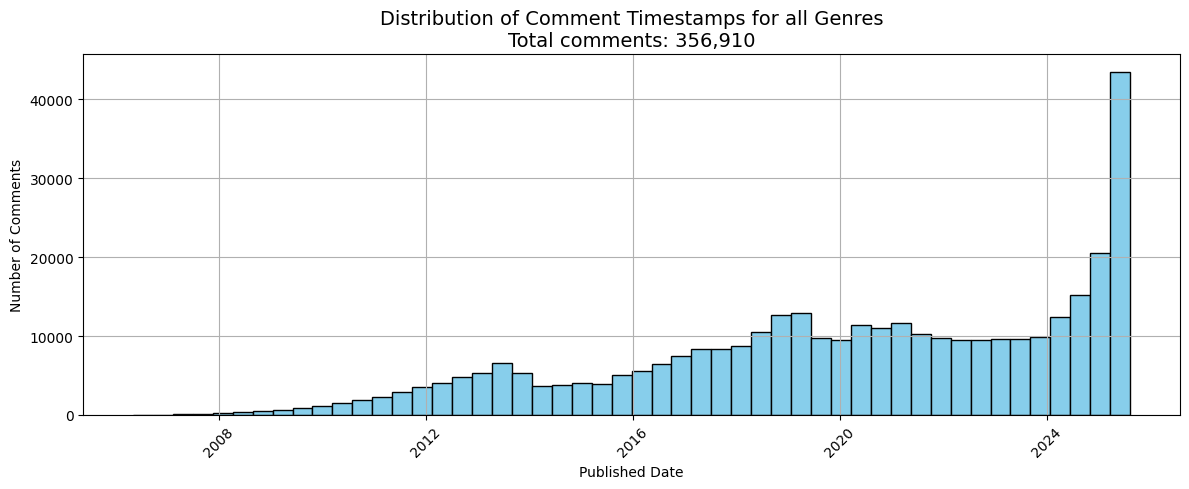

In [132]:
data = pd.read_csv('../data/final_dataset_english_only.csv')
data = data.dropna(subset=['publishedAt_x'])
data['publishedAt_x'] = pd.to_datetime(data['publishedAt_x'], errors='coerce')

total_comments = len(data)

plt.figure(figsize=(12, 5))
data['publishedAt_x'].hist(bins=50, color="skyblue", edgecolor="black")

plt.title(f"Distribution of Comment Timestamps for all Genres\nTotal comments: {total_comments:,}", fontsize=14)
plt.xlabel("Published Date")
plt.ylabel("Number of Comments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("plots/timedistr_allcomments.png")
plt.show()

#### who did write the comments and does there exist a user that might skew the results?

In [133]:
data_hip_hop['authorChannelUrl'].value_counts()

authorChannelUrl
http://www.youtube.com/@avalon.as.is1989            66
http://www.youtube.com/@DoujaHomie                   8
http://www.youtube.com/@vinhxo2k632                  7
http://www.youtube.com/@dysperdotted                 5
http://www.youtube.com/@shervendrasinghaveer8235     5
                                                    ..
http://www.youtube.com/@TonyMichaels166              1
http://www.youtube.com/@SeanM-z8i                    1
http://www.youtube.com/@duragjulie1182               1
http://www.youtube.com/@valkyrie273                  1
http://www.youtube.com/@Mrthor3535                   1
Name: count, Length: 5032, dtype: int64

In [134]:
data["vader_compound"] = pd.to_numeric(data["vader_compound"], errors="coerce")
data_hip_hop["vader_compound"] = pd.to_numeric(data_hip_hop["vader_compound"], errors="coerce")

# 1. Average compound of all comments
avg_all = data["vader_compound"].dropna().mean()

# 2. Average compound of all Hip Hop comments
avg_hiphop = data_hip_hop["vader_compound"].dropna().mean()

# 3. Average compound of all Avalon comments (inside Hip Hop)
avalon_comments = data_hip_hop[data_hip_hop["authorChannelUrl"] == "http://www.youtube.com/@avalon.as.is1989"]
avg_avalon = avalon_comments["vader_compound"].dropna().mean()

# 4. Average compound of Hip Hop excluding Avalon
hiphop_no_avalon = data_hip_hop[data_hip_hop["authorChannelUrl"] != "http://www.youtube.com/@avalon.as.is1989"]
avg_hiphop_no_avalon = hiphop_no_avalon["vader_compound"].dropna().mean()

print(f"Average compound score (all comments): {avg_all:.3f}")
print(f"Average compound score (Hip Hop only): {avg_hiphop:.3f}")
print(f"Average compound score (Avalon only): {avg_avalon:.3f} (n={len(avalon_comments)})")
print(f"Average compound score (Hip Hop excl. Avalon): {avg_hiphop_no_avalon:.3f} (n={len(hiphop_no_avalon)})")


Average compound score (all comments): 0.273
Average compound score (Hip Hop only): 0.150
Average compound score (Avalon only): -0.019 (n=66)
Average compound score (Hip Hop excl. Avalon): 0.152 (n=5352)


In [135]:
for idx, comment in enumerate(avalon_comments['textOriginal']):
    print(comment)
    if idx == 10:
        break

I am home.
People fail you don't mix any medication or medications with drinking alcohol.
You can go pixk up your medication or medications an not take them an go to a liquor store an get alcohol though, poof make people lose themselves.thinking an thoughting your mixing them together.
Nope!. ✌️ Wishful thinking an thoughting,knowing better is why.
Only once in a lifetime with me.
Just know if my hand go to my face, ill walk away from you like a damn ghost..... silently, I usually never show back up to you, speaks for myself already.
Random robin, i already known.
Being affiliated, does have nor create attchments, no discrimination, affiliation does carry any flags of any.
I let go if its a females or males with bad shadows, bad intentions is resoning of why.

That isthe light within me.
Time to clean out this place internally. 🧠🎓💌🧭🥀⌛☄️🎤♈.

Answer: I am the fade, I am ash. 🎤⌛☄️
C-4 is a air plane bomb, service number, can also be tue service number to air plane itself,(military.)  Ther

#### get where hiphop comment differentiate with others most?

In [136]:
pd.options.display.float_format = '{:,.4f}'.format

global_means = data.mean(numeric_only=True)
hiphop_means = data_hip_hop.mean(numeric_only=True)

comparison = pd.DataFrame({
    "all_data_mean": global_means,
    "hiphop_mean": hiphop_means
})

comparison["difference"] = comparison["hiphop_mean"] - comparison["all_data_mean"]
comparison["abs_diff"] = comparison["difference"].abs()

# Sort by largest absolute difference
comparison_sorted = comparison.sort_values("abs_diff", ascending=False)



In [137]:
print("\nTop differences (Hip hop vs. All data):\n")
comparison_sorted.head(20)


Top differences (Hip hop vs. All data):



,all_data_mean,hiphop_mean,difference,abs_diff
viewCount,"10,514,605.5895","16,526,803.3928","6,012,197.8033","6,012,197.8033"
likeCount_y,"82,195.9825","188,897.9677","106,701.9852","106,701.9852"
commentCount,"3,907.3989","11,693.2486","7,785.8497","7,785.8497"
Unnamed: 0,"314,727.9233","317,978.4199","3,250.4966","3,250.4966"
Tone,74.4495,66.2504,-8.1991,8.1991
WC,17.6304,20.6964,3.0660,3.0660
WPS,17.5177,20.5659,3.0482,3.0482
tone_pos,7.6108,5.3718,-2.2389,2.2389
Emoji,4.0854,6.2022,2.1167,2.1167
BigWords,14.9009,13.2157,-1.6852,1.6852


In [138]:
comparison_sorted.to_csv('correlation_hiphop_all_genres.csv')

Interpretation:

    -some logical correlation occur like the Tone is down. Interestly we can see that they tend to write 2 more emoji per comment in HipHop genre. (might find some interesting correlations later)

# does more views lead to lower average compound score?

C:\Users\Tobias Wollendorfer\AppData\Local\Temp\ipykernel_28564\2908335377.py:65: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0,0),1,1,color="steelblue", edgecolor="black", label="Top 5 Genres"),
C:\Users\Tobias Wollendorfer\AppData\Local\Temp\ipykernel_28564\2908335377.py:66: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0,0),1,1,color="lightcoral", edgecolor="black", label="Bottom 5 Genres")


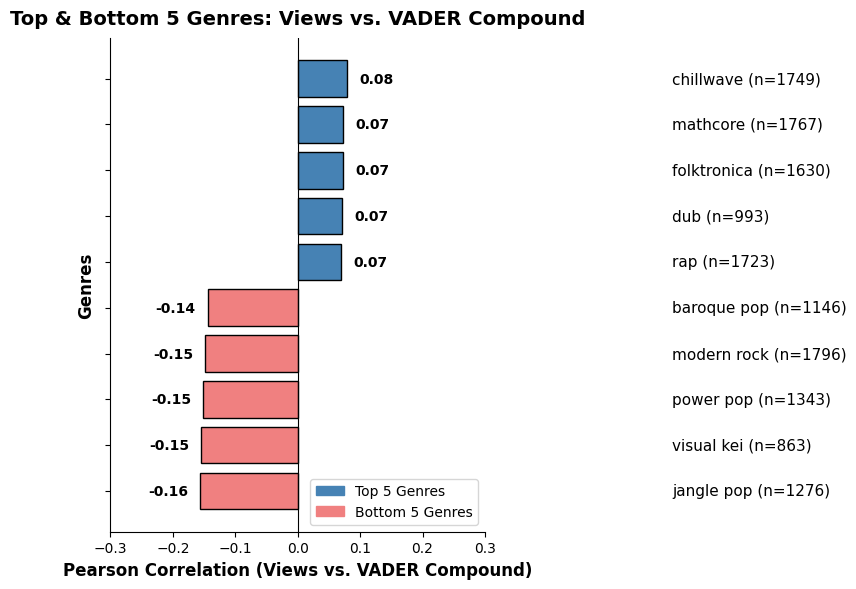

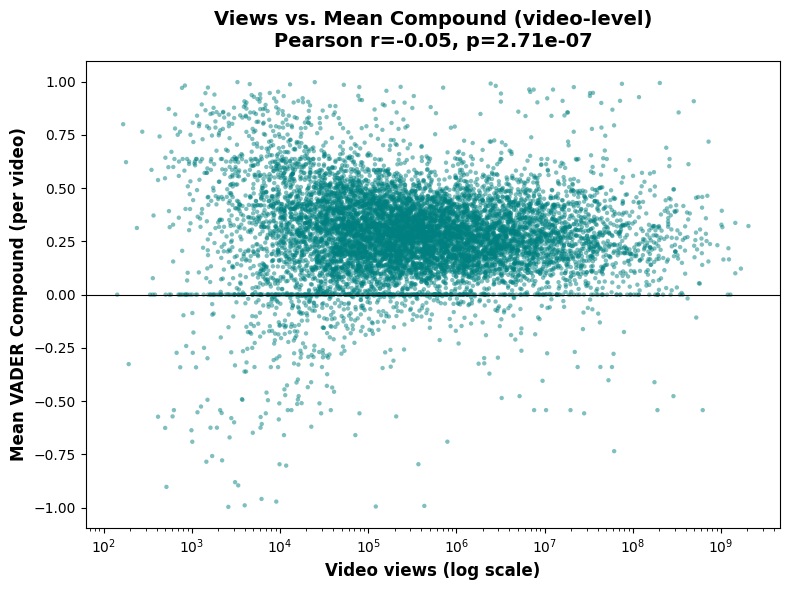

In [139]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# --- Prepare data ---
for col in ["viewCount", "vader_compound"]:
    data[col] = pd.to_numeric(data[col], errors="coerce")

data["viewCount_log"] = np.log1p(data["viewCount"])

MIN_N = 500
corrs = []

df_valid = data.dropna(subset=["genre", "viewCount_log", "vader_compound"])

for genre, df_g in df_valid.groupby("genre"):
    if len(df_g) >= MIN_N and df_g["viewCount_log"].var() > 0:
        r = df_g["viewCount_log"].corr(df_g["vader_compound"])
        corrs.append((genre, len(df_g), r))

corr_df = pd.DataFrame(corrs, columns=["genre", "n", "corr_views_comp"])

# --- Consistent styled bar plot ---
def plot_top_bottom5_corr(df, col, title, ylim=(-0.3, 0.3), savefile=None):
    sorted_df = df.sort_values(col, ascending=False)
    top5 = sorted_df.head(5)
    bottom5 = sorted_df.tail(5)
    subset = pd.concat([top5, bottom5])

    colors = ["steelblue"] * len(top5) + ["lightcoral"] * len(bottom5)

    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.barh(range(len(subset)), subset[col],
                   color=colors, edgecolor="black")

    ax.invert_yaxis()

    pad = 0.02
    label_x = 0.6

    for i, (genre, n, v) in enumerate(zip(subset["genre"], subset["n"], subset[col])):
        # genre label always at fixed x=0.6
        ax.text(label_x, i, f"{genre} (n={n})", va="center", ha="left",
                color="black", fontsize=11)
        # numeric correlation at bar end
        ax.text(v + (pad if v >= 0 else -pad), i, f"{v:.2f}",
                va="center", ha="left" if v >= 0 else "right",
                fontsize=10, fontweight="bold")

    ax.set_title(title, fontsize=14, fontweight="bold", pad=10)
    ax.set_xlabel("Pearson Correlation (Views vs. VADER Compound)", fontsize=12, fontweight="bold")
    ax.set_ylabel("Genres", fontsize=12, fontweight="bold")

    ax.set_yticks(range(len(subset)))
    ax.set_yticklabels([""] * len(subset))

    ax.set_xlim(*ylim)
    ax.axvline(0, color="black", linewidth=0.8)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.legend(handles=[
        plt.Rectangle((0,0),1,1,color="steelblue", edgecolor="black", label="Top 5 Genres"),
        plt.Rectangle((0,0),1,1,color="lightcoral", edgecolor="black", label="Bottom 5 Genres")
    ], loc="lower right")

    plt.tight_layout()
    if savefile:
        plt.savefig(savefile, dpi=150, bbox_inches="tight")
    plt.show()

plot_top_bottom5_corr(
    corr_df,
    "corr_views_comp",
    "Top & Bottom 5 Genres: Views vs. VADER Compound",
    ylim=(-0.3, 0.3),
    savefile="plots/vader_analysis/corr_views_comp_tb5.png"
)

# --- Scatterplot at video level ---
vid_agg = (
    data.dropna(subset=["videoId", "viewCount", "vader_compound"])
        .groupby("videoId")
        .agg(
            viewCount=("viewCount", "max"),
            mean_compound=("vader_compound", "mean"),
            genre=("genre", lambda x: x.mode().iat[0] if not x.mode().empty else x.iloc[0])
        )
        .reset_index()
)

vid_agg["viewCount_log"] = np.log1p(vid_agg["viewCount"])
overall_r, overall_p = pearsonr(vid_agg["viewCount_log"], vid_agg["mean_compound"])

plt.figure(figsize=(8, 6))
plt.scatter(vid_agg["viewCount"], vid_agg["mean_compound"], s=10, alpha=0.5, color="teal", edgecolor="none")
plt.xscale("log")
plt.xlabel("Video views (log scale)", fontsize=12, fontweight="bold")
plt.ylabel("Mean VADER Compound (per video)", fontsize=12, fontweight="bold")
plt.title(f"Views vs. Mean Compound (video-level)\nPearson r={overall_r:.2f}, p={overall_p:.3g}",
          fontsize=14, fontweight="bold", pad=10)
plt.axhline(0, color="black", linewidth=0.8)
plt.tight_layout()
plt.savefig("plots/vader_analysis/scatter_views_vs_mean_compound.png", dpi=150, bbox_inches="tight")
plt.show()


# do user with more emoji usage tend to write more negative comments?

In [5]:
import pandas as pd

# Ensure numeric
data["Emoji"] = pd.to_numeric(data["Emoji"], errors="coerce").fillna(0)
data["vader_compound"] = pd.to_numeric(data["vader_compound"], errors="coerce")

# Split groups
with_emoji = data[data["Emoji"] > 0]["vader_compound"]
no_emoji   = data[data["Emoji"] == 0]["vader_compound"]

# Compute means
avg_with   = with_emoji.mean()
avg_without = no_emoji.mean()

print("Average compound score with emojis: ", avg_with)
print("Average compound score without emojis:", avg_without)
print("Difference:", avg_with - avg_without)


Average compound score with emojis:  0.41729066141020493
Average compound score without emojis: 0.254570170868471
Difference: 0.16272049054173393


#### threshold where the difference of the amount of emojis are the highest (include emojis in vaderscore)? (all bins possible) confirm first intuition

In [6]:
import pandas as pd

# Ensure numeric
data["Emoji"] = pd.to_numeric(data["Emoji"], errors="coerce").fillna(0)
data["vader_compound"] = pd.to_numeric(data["vader_compound"], errors="coerce")

# Split groups
with_emoji = data[data["Emoji"] > 0]["vader_compound"]
no_emoji   = data[data["Emoji"] == 0]["vader_compound"]

# Compute means
avg_with   = with_emoji.mean()
avg_without = no_emoji.mean()

print("Average compound score with emojis: ", avg_with)
print("Average compound score without emojis:", avg_without)
print("Difference:", avg_with - avg_without)

results = []

for x in range(1, 101):
    group1 = data[(data["Emoji"] >= 1) & (data["Emoji"] <= x)]["vader_compound"]
    group2 = data[data["Emoji"] > x]["vader_compound"]
    
    if len(group1) > 0 and len(group2) > 0:
        avg1 = group1.mean()
        avg2 = group2.mean()
        diff = abs(avg1 - avg2)
        results.append((x, avg1, avg2, diff, len(group1), len(group2)))

res_df = pd.DataFrame(results, columns=["threshold", "avg_1_to_x", "avg_gt_x", "abs_diff", "n_1_to_x", "n_gt_x"])

res_sorted = res_df.sort_values("abs_diff", ascending=False)

print("Top threshold(s) that maximize difference in average compound score:")
print(res_sorted.head(5))


Average compound score with emojis:  0.41729066141020493
Average compound score without emojis: 0.254570170868471
Difference: 0.16272049054173393
Top threshold(s) that maximize difference in average compound score:
   threshold  avg_1_to_x  avg_gt_x  abs_diff  n_1_to_x  n_gt_x
0          1    0.939450  0.417460  0.521990         4   39659
1          2    0.626130  0.414466  0.211664       571   39092
2          3    0.583022  0.411349  0.171673      1424   38239
3          4    0.543775  0.408447  0.135327      2657   37006
4          5    0.520357  0.405740  0.114617      4074   35589


C:\Users\Tobias Wollendorfer\AppData\Local\Temp\ipykernel_1760\3832592300.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


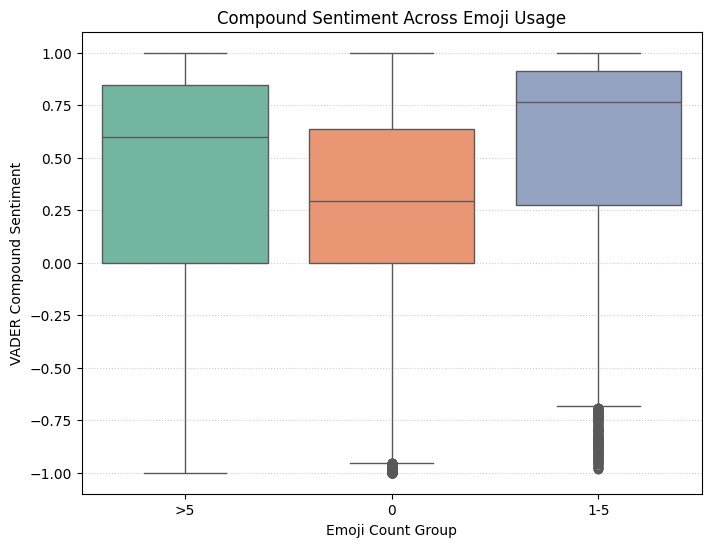

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure numeric
data["Emoji"] = pd.to_numeric(data["Emoji"], errors="coerce")
data["vader_compound"] = pd.to_numeric(data["vader_compound"], errors="coerce")

# Group emojis
def categorize_emoji(n):
    if n == 0:
        return "0"
    elif 1 <= n <= 5:
        return "1-5"
    elif n > 5:
        return ">5"
    else:
        return None

data["emoji_group"] = data["Emoji"].apply(categorize_emoji)
plot_data = data.dropna(subset=["emoji_group"]).copy()

# --- Original Boxplot ---
plt.figure(figsize=(8,6))
sns.boxplot(
    x="emoji_group",
    y="vader_compound",
    data=plot_data,
    palette="Set2",
    showfliers=True
)
plt.title("Compound Sentiment Across Emoji Usage")
plt.xlabel("Emoji Count Group")
plt.ylabel("VADER Compound Sentiment")
plt.grid(axis="y", linestyle=":", alpha=0.6)
plt.savefig("plots/vader_analysis/boxplot_emoji_compound.png")
plt.show()


#### include emojis in vaderscore calculation

In [9]:
import pandas as pd

data_with_emoji = data[data["Emoji"] > 0].copy()
data_with_emoji["Emoji"] = pd.to_numeric(data_with_emoji["Emoji"], errors="coerce")
data_with_emoji["vader_compound"] = pd.to_numeric(data_with_emoji["vader_compound"], errors="coerce")

results_with_emoji = []

for thresh in range(1, 101):
    group1 = data_with_emoji[(data_with_emoji["Emoji"] >= 1) & (data_with_emoji["Emoji"] <= thresh)]["vader_compound"]
    group2 = data_with_emoji[data_with_emoji["Emoji"] > thresh]["vader_compound"]
    
    if len(group1) > 0 and len(group2) > 0:
        avg1 = group1.mean()
        avg2 = group2.mean()
        diff = abs(avg1 - avg2)
        results_with_emoji.append((thresh, avg1, avg2, diff, len(group1), len(group2)))

res_df_with_emoji = pd.DataFrame(
    results_with_emoji, 
    columns=["threshold", "avg_1_to_x", "avg_gt_x", "abs_diff", "n_1_to_x", "n_gt_x"]
)

res_sorted_with_emoji = res_df_with_emoji.sort_values("abs_diff", ascending=False)

print("Thresholds ranked by absolute difference in average compound (with emojis):")
print(res_sorted_with_emoji)


Thresholds ranked by absolute difference in average compound (with emojis):
    threshold  avg_1_to_x  avg_gt_x  abs_diff  n_1_to_x  n_gt_x
0           1    0.939450  0.417460  0.521990         4   39659
1           2    0.626130  0.414466  0.211664       571   39092
2           3    0.583022  0.411349  0.171673      1424   38239
3           4    0.543775  0.408447  0.135327      2657   37006
4           5    0.520357  0.405740  0.114617      4074   35589
..        ...         ...       ...       ...       ...     ...
44         45    0.416582  0.420893  0.004311     31102    8561
45         46    0.416607  0.420832  0.004225     31160    8503
46         47    0.416817  0.420084  0.003266     31219    8444
48         49    0.416915  0.419730  0.002815     31246    8417
47         48    0.416932  0.419668  0.002736     31240    8423

[100 rows x 6 columns]


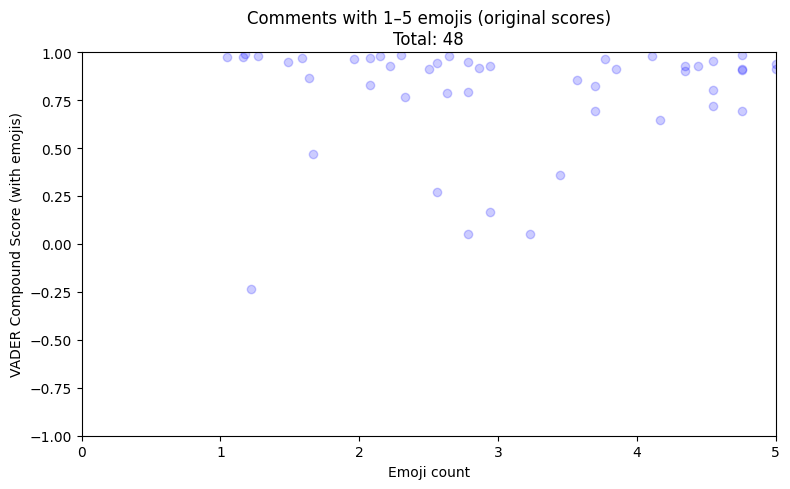

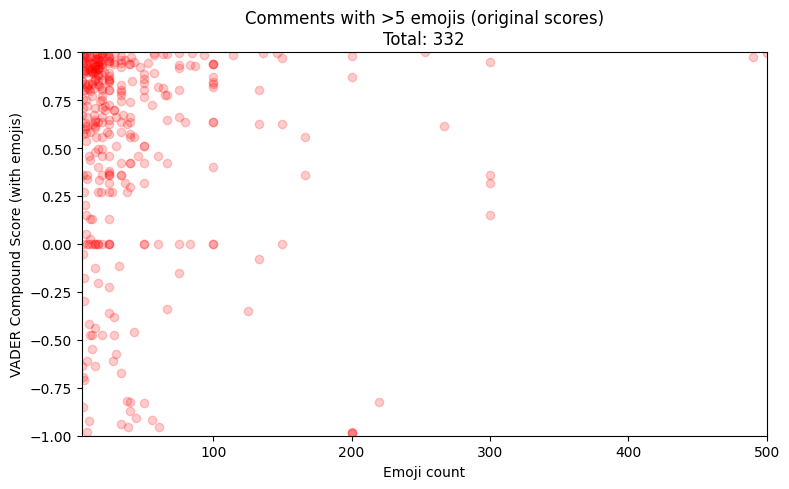

Average compound score (with emojis, 1–5 emojis): 0.790
Average compound score (with emojis, >5 emojis): 0.517


In [144]:
# --- Using original compound scores that include emojis ---

# 1) Plot: 1–5 emojis
df_1to5_w = df_with_emoji[(df_with_emoji["Emoji"] >= 1) & (df_with_emoji["Emoji"] <= 5)]
x1_w, y1_w = df_1to5_w["Emoji"], df_1to5_w["vader_compound"]

plt.figure(figsize=(8, 5))
plt.scatter(x1_w, y1_w, alpha=0.2, color="blue")
plt.xlabel("Emoji count")
plt.ylabel("VADER Compound Score (with emojis)")
plt.title(f"Comments with 1–5 emojis (original scores)\nTotal: {len(df_1to5_w):,}")
plt.xlim(0, 5)
plt.ylim(-1, 1)
plt.tight_layout()
plt.savefig("plots/emoji_scatter_1to5_withemoji.png")
plt.show()

# 2) Plot: >5 emojis
df_gt5_w = df_with_emoji[df_with_emoji["Emoji"] > 5]
x2_w, y2_w = df_gt5_w["Emoji"], df_gt5_w["vader_compound"]

plt.figure(figsize=(8, 5))
plt.scatter(x2_w, y2_w, alpha=0.2, color="red")
plt.xlabel("Emoji count")
plt.ylabel("VADER Compound Score (with emojis)")
plt.title(f"Comments with >5 emojis (original scores)\nTotal: {len(df_gt5_w):,}")
plt.xlim(5, max(6, float(df_gt5_w["Emoji"].max())) if len(df_gt5_w) else 6)
plt.ylim(-1, 1)
plt.tight_layout()
plt.savefig("plots/emoji_scatter_gt5_withemoji.png")
plt.show()

# Averages
print(f"Average compound score (with emojis, 1–5 emojis): {y1_w.mean():.3f}")
print(f"Average compound score (with emojis, >5 emojis): {y2_w.mean():.3f}")


#### exclude emojis in vaderscore calculation

In [145]:
df["Emoji"] = pd.to_numeric(df["Emoji"], errors="coerce")
df["vader_compound"] = pd.to_numeric(df["vader_compound"], errors="coerce")

# comments with at least 1 emoji
df_with_emoji = df[df["Emoji"] > 0].copy()

text_col = "preprocessed_comment"  

def strip_emojis(s: str) -> str:
    if not isinstance(s, str):
        return ""
    return demoji.replace(s, "")

df_with_emoji["text_noemoji"] = df_with_emoji[text_col].astype(str).apply(strip_emojis)

# Recompute VADER
analyzer = SentimentIntensityAnalyzer()
df_with_emoji["vader_compound_noemoji"] = df_with_emoji["text_noemoji"].apply(
    lambda s: analyzer.polarity_scores(s)["compound"]
)


In [146]:
df_with_emoji["Emoji"] = pd.to_numeric(df_with_emoji["Emoji"], errors="coerce")
df_with_emoji["vader_compound_noemoji"] = pd.to_numeric(df_with_emoji["vader_compound_noemoji"], errors="coerce")

results = []

for thresh in range(1, 101):
    group1 = df_with_emoji[(df_with_emoji["Emoji"] >= 1) & (df_with_emoji["Emoji"] <= thresh)]["vader_compound_noemoji"]
    group2 = df_with_emoji[df_with_emoji["Emoji"] > thresh]["vader_compound_noemoji"]
    
    if len(group1) > 0 and len(group2) > 0:
        avg1 = group1.mean()
        avg2 = group2.mean()
        diff = abs(avg1 - avg2)
        results.append((thresh, avg1, avg2, diff, len(group1), len(group2)))

res_df = pd.DataFrame(results, columns=["threshold", "avg_1_to_x", "avg_gt_x", "abs_diff", "n_1_to_x", "n_gt_x"])

res_sorted = res_df.sort_values("abs_diff", ascending=False)

print("Thresholds ranked by absolute difference in average compound (no-emoji):")
res_sorted


Thresholds ranked by absolute difference in average compound (no-emoji):


,threshold,avg_1_to_x,avg_gt_x,abs_diff,n_1_to_x,n_gt_x
3,5,0.7206,0.4162,0.3044,48,332
1,3,0.7121,0.4350,0.2771,27,353
2,4,0.6885,0.4317,0.2568,34,346
93,95,0.4787,0.2381,0.2406,342,38
97,99,0.4787,0.2381,0.2406,342,38
...,...,...,...,...,...,...
9,11,0.5485,0.4150,0.1335,113,267
13,15,0.5330,0.3996,0.1334,157,223
8,10,0.5498,0.4164,0.1333,109,271
37,39,0.4898,0.3575,0.1323,279,101


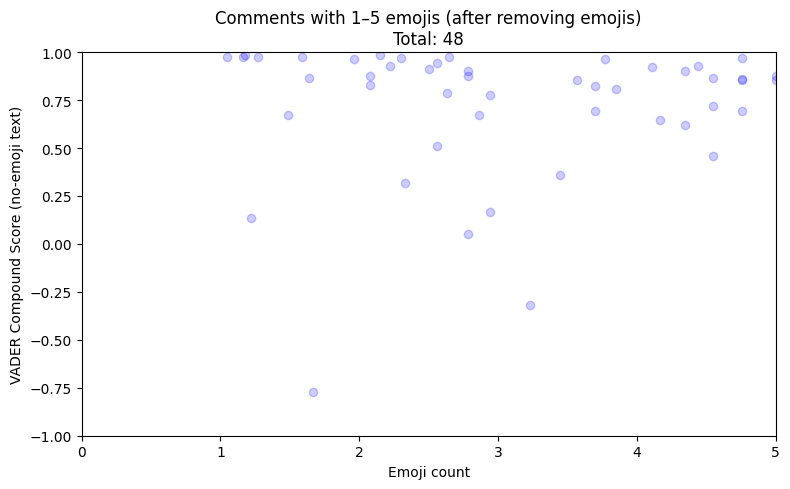

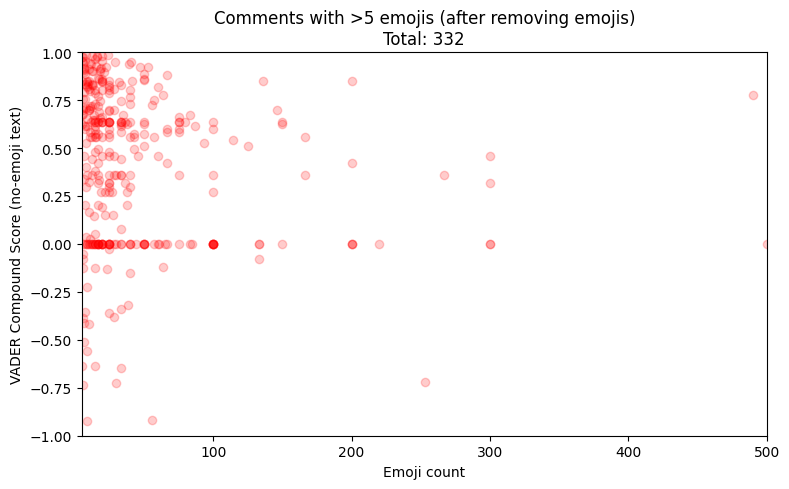

Average compound score (no-emoji, 1–5 emojis): 0.721
Average compound score (no-emoji, >5 emojis): 0.416


In [147]:
# 1. Plot: 1–5 emojis
df_1to5 = df_with_emoji[(df_with_emoji["Emoji"] >= 1) & (df_with_emoji["Emoji"] <= 5)]
x1, y1 = df_1to5["Emoji"], df_1to5["vader_compound_noemoji"]

plt.figure(figsize=(8, 5))
plt.scatter(x1, y1, alpha=0.2, color="blue")
plt.xlabel("Emoji count")
plt.ylabel("VADER Compound Score (no-emoji text)")
plt.title(f"Comments with 1–5 emojis (after removing emojis)\nTotal: {len(df_1to5):,}")
plt.xlim(0, 5)
plt.ylim(-1, 1)
plt.tight_layout()
plt.savefig("plots/emoji_scatter_1to5_noemoji.png")
plt.show()

# 2. Plot: >5 emojis
df_gt5 = df_with_emoji[df_with_emoji["Emoji"] > 5]
x2, y2 = df_gt5["Emoji"], df_gt5["vader_compound_noemoji"]

plt.figure(figsize=(8, 5))
plt.scatter(x2, y2, alpha=0.2, color="red")
plt.xlabel("Emoji count")
plt.ylabel("VADER Compound Score (no-emoji text)")
plt.title(f"Comments with >5 emojis (after removing emojis)\nTotal: {len(df_gt5):,}")
plt.xlim(5, max(6, float(df_gt5["Emoji"].max())) if len(df_gt5) else 6)
plt.ylim(-1, 1)
plt.tight_layout()
plt.savefig("plots/emoji_scatter_gt5_noemoji.png")
plt.show()

print(f"Average compound score (no-emoji, 1–5 emojis): {y1.mean():.3f}")
print(f"Average compound score (no-emoji, >5 emojis): {y2.mean():.3f}")


Interpretation:

    - user who write comments including 1-5 emojis tend write write a lot positive comments. (0.720)
    
    - wheras if they write even emojis tend positivity goes down (0.41 even though it still more positive then negative)

# Polarisierung

#### comment level

C:\Users\Tobias Wollendorfer\AppData\Local\Temp\ipykernel_13748\2077596275.py:65: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0,0),1,1,color="steelblue", edgecolor="black", label="Top 5 Genres"),
C:\Users\Tobias Wollendorfer\AppData\Local\Temp\ipykernel_13748\2077596275.py:66: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0,0),1,1,color="lightcoral", edgecolor="black", label="Bottom 5 Genres")


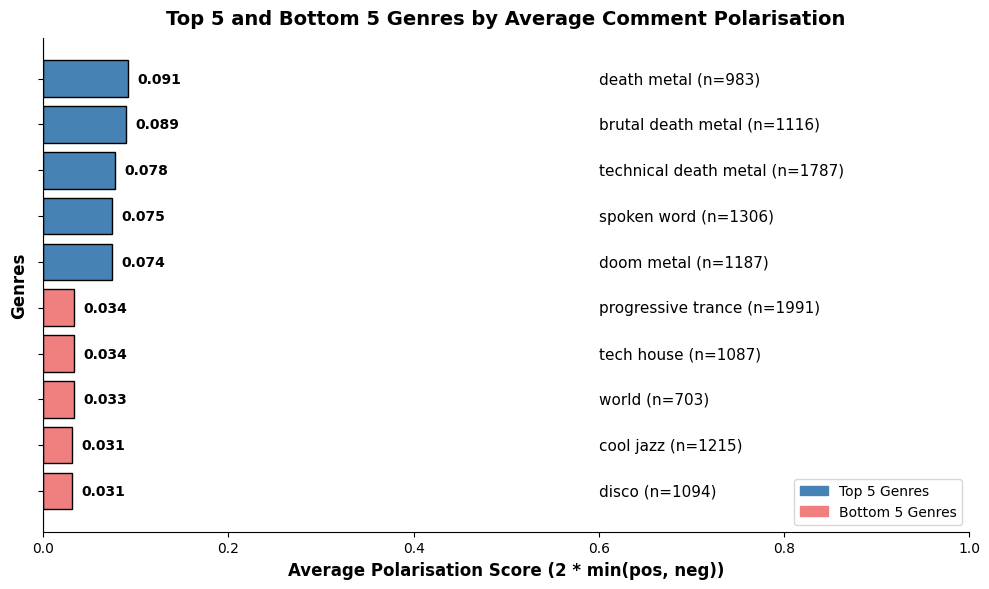

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# compute polarisation
data["polarisation"] = 2 * data[["vader_pos", "vader_neg"]].min(axis=1)

agg = (
    data.dropna(subset=['genre'])
        .groupby('genre', dropna=True)
        .agg(mean_polarisation=('polarisation', 'mean'),
             n=('polarisation', 'size'))
)

MIN_N = 500
agg = agg[agg['n'] >= MIN_N]

agg_sorted = agg.sort_values('mean_polarisation', ascending=False)

top5 = agg_sorted.head(5)
bottom5 = agg_sorted.tail(5)
extremes = pd.concat([top5, bottom5]).drop_duplicates()

order = list(top5.index) + [g for g in bottom5.index if g not in top5.index]
extremes = extremes.loc[order].copy()

# colors for bars
colors = ["steelblue"] * len(top5) + ["lightcoral"] * len(bottom5)

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.barh(range(len(extremes)), extremes['mean_polarisation'],
               color=colors, edgecolor='black')

ax.invert_yaxis()

pad = 0.01
label_x = 0.6

for i, (genre, v, n) in enumerate(zip(extremes.index,
                                      extremes['mean_polarisation'].values,
                                      extremes['n'].values)):
    # genre label outside at fixed x=0.6
    ax.text(label_x, i, f"{genre} (n={n})",
            va='center', ha='left', color="black", fontsize=11)
    # numeric score next to the bar end
    ax.text(v + pad, i, f"{v:.3f}", va='center', ha='left',
            color="black", fontsize=10, fontweight="bold")

ax.set_title("Top 5 and Bottom 5 Genres by Average Comment Polarisation",
             fontsize=14, fontweight='bold', pad=10)
ax.set_xlabel("Average Polarisation Score (2 * min(pos, neg))",
              fontsize=12, fontweight='bold')
ax.set_ylabel("Genres", fontsize=12, fontweight='bold')

ax.set_yticks(range(len(extremes)))
ax.set_yticklabels([""] * len(extremes))

ax.set_xlim(0, 1)  # polarisation always in [0,1]
ax.axvline(0, color="black", linewidth=0.8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(handles=[
    plt.Rectangle((0,0),1,1,color="steelblue", edgecolor="black", label="Top 5 Genres"),
    plt.Rectangle((0,0),1,1,color="lightcoral", edgecolor="black", label="Bottom 5 Genres")
], loc="lower right")

plt.tight_layout()
plt.savefig('plots/vader_analysis/average_polarisation.png', dpi=150, bbox_inches="tight")
plt.show()


#### Genre-Level Polarisation: Positive vs Negative Comment Split

C:\Users\Tobias Wollendorfer\AppData\Local\Temp\ipykernel_13748\1793936036.py:76: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0,0),1,1,color="steelblue", edgecolor="black", label="Top 5 Genres"),
C:\Users\Tobias Wollendorfer\AppData\Local\Temp\ipykernel_13748\1793936036.py:77: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0,0),1,1,color="lightcoral", edgecolor="black", label="Bottom 5 Genres")


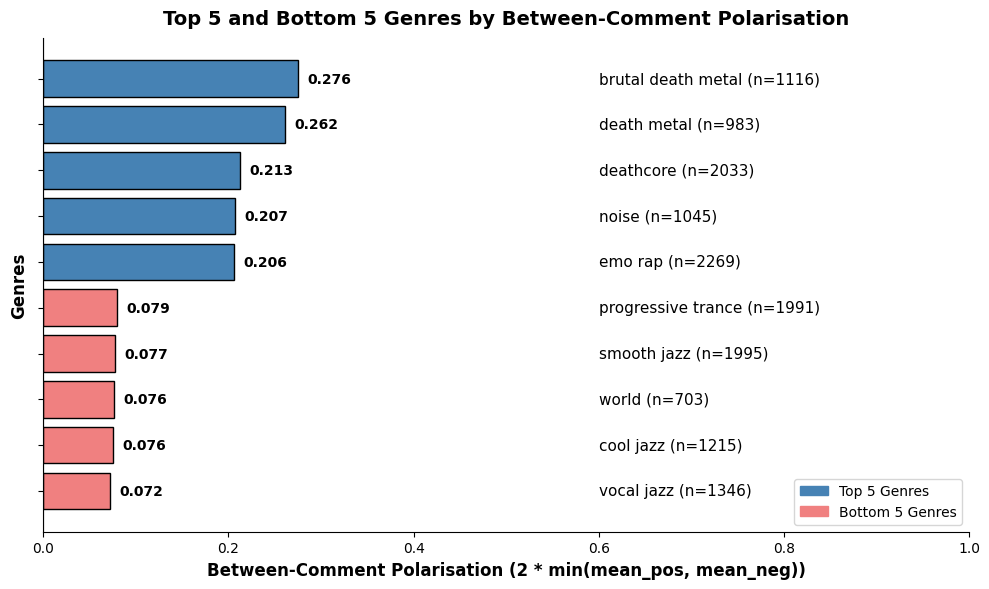

In [28]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Compute between-comment polarisation (per genre) ---
agg_between = (
    data.dropna(subset=["genre"])
        .groupby("genre", dropna=True)
        .agg(
            mean_pos=("vader_pos", "mean"),
            mean_neg=("vader_neg", "mean"),
            n=("vader_pos", "size")
        )
        .assign(between_polarisation=lambda df: 2 * df[["mean_pos", "mean_neg"]].min(axis=1))
)

# --- Filter by minimum sample size ---
MIN_N = 500
agg_between = agg_between[agg_between["n"] >= MIN_N]

# --- Prepare output dir ---
outdir = "plots/vader_analysis"
os.makedirs(outdir, exist_ok=True)

# --- Sort & select extremes ---
agg_sorted = agg_between.sort_values("between_polarisation", ascending=False)
top5 = agg_sorted.head(5)
bottom5 = agg_sorted.tail(5)
extremes = pd.concat([top5, bottom5]).drop_duplicates()

# keep order: top first, then bottom (without duplicates)
order = list(top5.index) + [g for g in bottom5.index if g not in top5.index]
extremes = extremes.loc[order].copy()

# --- Colors ---
colors = ["steelblue"] * len(top5) + ["lightcoral"] * len(bottom5)

# --- Plot ---
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.barh(range(len(extremes)), extremes["between_polarisation"],
               color=colors, edgecolor="black")

ax.invert_yaxis()

pad = 0.01
label_x = 0.6

for i, (genre, v, n) in enumerate(zip(extremes.index,
                                      extremes["between_polarisation"].values,
                                      extremes["n"].values)):
    # genre labels outside at fixed position
    ax.text(label_x, i, f"{genre} (n={n})",
            va="center", ha="left", color="black", fontsize=11)
    # numeric values at bar end
    ax.text(v + pad, i, f"{v:.3f}", va="center", ha="left",
            color="black", fontsize=10, fontweight="bold")

ax.set_title("Top 5 and Bottom 5 Genres by Between-Comment Polarisation",
             fontsize=14, fontweight="bold", pad=10)
ax.set_xlabel("Between-Comment Polarisation (2 * min(mean_pos, mean_neg))",
              fontsize=12, fontweight="bold")
ax.set_ylabel("Genres", fontsize=12, fontweight="bold")

ax.set_yticks(range(len(extremes)))
ax.set_yticklabels([""] * len(extremes))

ax.set_xlim(0, 1)  # polarisation is bounded between 0 and 1
ax.axvline(0, color="black", linewidth=0.8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(handles=[
    plt.Rectangle((0,0),1,1,color="steelblue", edgecolor="black", label="Top 5 Genres"),
    plt.Rectangle((0,0),1,1,color="lightcoral", edgecolor="black", label="Bottom 5 Genres")
], loc="lower right")

plt.tight_layout()
plt.savefig(f"{outdir}/between_polarisation_top_bottom.png", dpi=150, bbox_inches="tight")
plt.show()


In [29]:
agg_sorted.head()

,mean_pos,mean_neg,n,between_polarisation
genre,,,,
brutal death metal,0.180390,0.137761,1116,0.275522
death metal,0.183554,0.130770,983,0.261540
deathcore,0.171934,0.106517,2033,0.213035
noise,0.163737,0.103637,1045,0.207275
emo rap,0.182963,0.102912,2269,0.205824


In [30]:
hip_hop = ["hip hop", "experimental hip hop", "alternative hip hop"]

In [31]:
# Ensure consistent lowercase matching
agg_sorted.index = agg_sorted.index.str.lower()

hip_hop = ["hip hop", "experimental hip hop", "alternative hip hop"]

# Get ranks (1 = highest polarisation)
ranks = {
    genre: (agg_sorted.index.get_loc(genre) + 1, agg_sorted.shape[0])
    for genre in hip_hop if genre in agg_sorted.index
}

print("Ranks among all genres (by between_polarisation):")
for genre, (rank, total) in ranks.items():
    print(f"{genre}: {rank}/{total}")


Ranks among all genres (by between_polarisation):
hip hop: 39/233
experimental hip hop: 7/233
alternative hip hop: 23/233


#### Interpretation
Unfortunaty there is no exist paper which focused these on this topic to compare my results. 
Nothing really unexpected.
